<a href="https://colab.research.google.com/github/mohatamegha/Employee-Attrition-Analysis-and-Prediction/blob/main/Employee_Attrition_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the required modules

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


2. Checking the count of people who have left

In [ ]:
df['left'].value_counts()

,count
left,
0,11428
1,3571


Exploratory Data Analysis

In [ ]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

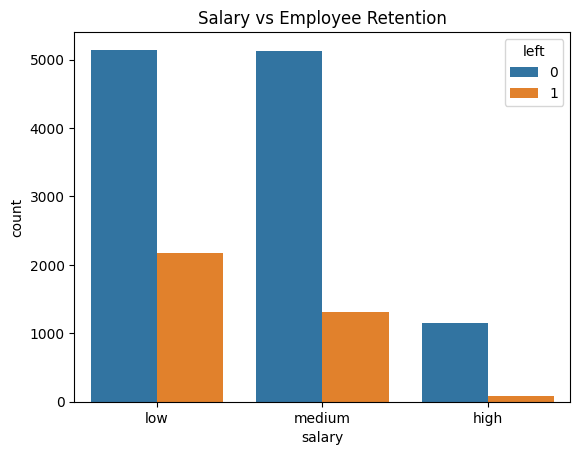

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary vs Employee Retention")
plt.show()

We can see that the people with high salary tend to not leave where as the people with low salary are leaving the most, followed by people with medium salary.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

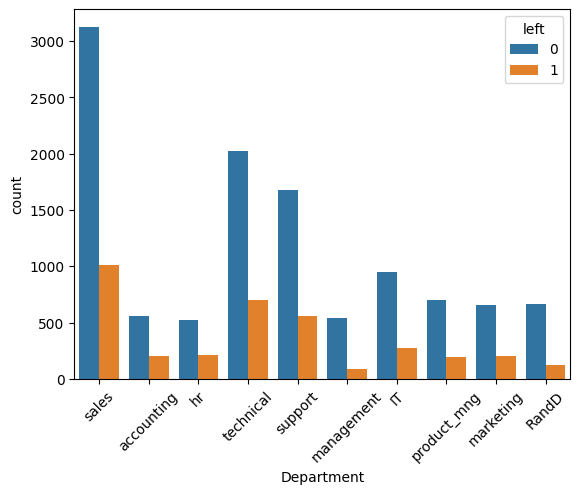

In [ ]:
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis.

In [ ]:
pd.crosstab(df['salary'], df['left'], normalize='index')

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


Exploratory data analysis revealed that employee retention is strongly influenced by satisfaction level, promotions in the last five years, and salary. Additionally, average monthly hours has a moderate impact on whether an employee leaves the company. Based on these findings, these four features will be retained for training the logistic regression model, while other variables—such as last evaluation, number of projects, time spent at the company, work accidents, and department—will be excluded, as they do not show a significant or direct effect on retention.

One hot encoding for salaries as it contains: low, medium and high as values

In [ ]:
# Select features and target
df_model = df[['satisfaction_level', 'promotion_last_5years', 'salary', 'average_montly_hours', 'left']]

# One-hot encode the 'salary' column
df_model_encoded = pd.get_dummies(df_model, columns=['salary'], drop_first=True)

# Check the first few rows
df_model_encoded.head()


,satisfaction_level,promotion_last_5years,average_montly_hours,left,salary_low,salary_medium
0,0.38,0,157,1,True,False
1,0.80,0,262,1,False,True
2,0.11,0,272,1,False,True
3,0.72,0,223,1,True,False
4,0.37,0,159,1,True,False


Train-Test Split of the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_model_encoded.drop('left', axis=1)
y = df_model_encoded['left']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training the logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

#train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Accuracy on test set
accuracy = model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

# Detailed performance
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.762
Confusion Matrix:
 [[2124  170]
 [ 544  162]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.49      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000

